In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_excel('Final_Train.xlsx')
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
df_train.shape

(5961, 7)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
df_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [6]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

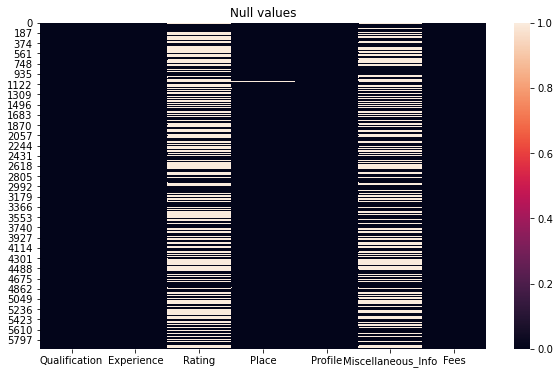

In [7]:
#using heat maps to see null values in the data set
plt.figure(figsize = [10,6])
sns.heatmap(df_train.isnull())
plt.title('Null values')
plt.show()

As we can see lots of null values are present in Rating and Miscellaneous_Info

In [8]:
# removing null values from the above mentioned data set
df_train["Rating"] = df_train["Rating"].fillna(method='ffill') #replacing null values using ffill
df_train["Place"] = df_train["Place"].fillna(method='ffill') #replacing null values using ffill

In [9]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

We have removed all the null values from the datasets

In [11]:
df_test = pd.read_excel('Final_Test.xlsx')
df_test.shape

(1987, 6)

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [13]:
df_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [14]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Some null values are present in the Rating and Miscellaneos_info and cery few missing values in Place.

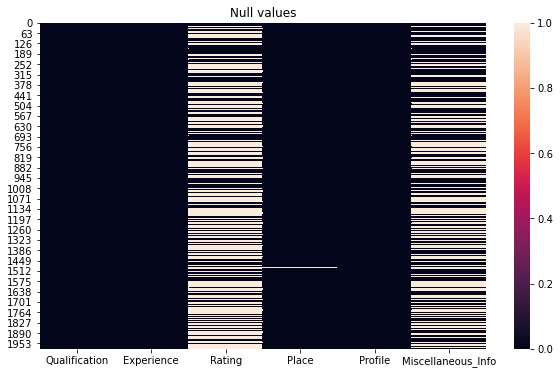

In [15]:
#using heat maps to see null values in the data set
plt.figure(figsize = [10,6])
sns.heatmap(df_test.isnull())
plt.title('Null values')
plt.show()

As we can see lots of null values are present in Rating and Miscellaneous_Info

In [16]:
# removing null values from the above test data set
df_test["Rating"] = df_test["Rating"].fillna(method='ffill') #replacing null values using ffill
df_test["Place"] = df_test["Place"].fillna(method='ffill') #replacing null values using ffill

In [17]:
df_test.isnull().sum()

Qualification           0
Experience              0
Rating                  2
Place                   0
Profile                 0
Miscellaneous_Info    834
dtype: int64

In [18]:
df_test["Place"] = df_test["Place"].fillna(method='ffill') #replacing null values using ffill
df_test["Place"].isnull().sum()

0

In [19]:
#we have removed null values from the test data set

In [20]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,98%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,98%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [21]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,70%,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [22]:
#in the places ,we can see that city is also included in it so we'll split city from the places and store it in different variable.
df_train['City'] = df_train['Place'].str.split(', ').str[-1]
df_train['Area'] = df_train['Place'].str.split(', ').str[0]


df_test['City'] = df_test['Place'].str.split(', ').str[-1]
df_test['Area'] = df_test['Place'].str.split(', ').str[0]

df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9 years experience,98%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12 years experience,98%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [23]:
count = df_train.groupby(['City']).count()
count.Qualification

City
Bangalore             1263
Chennai                858
Coimbatore             230
Delhi                 1186
Ernakulam              153
Hyderabad              957
Mumbai                1226
Thiruvananthapuram      87
e                        1
Name: Qualification, dtype: int64

In [24]:
#since e is anonymous value so we'll be finding the index of 'e' and we'll drop it
df_train[df_train['City'] == 'e'].index

Int64Index([3980], dtype='int64')

In [25]:
df_train = df_train.drop([3980])

In [26]:
#Since experience dataset has 'years experience' mentioned with the experience year.we'll be extracting only years from it. 
df_train["Experience"] = df_train["Experience"].str.split()#splitting experience
df_train["Experience"] = df_train["Experience"].str[0].astype("int")#converting to int type 


df_test["Experience"] = df_test["Experience"].str.split()#splitting experience
df_test["Experience"] = df_test["Experience"].str[0].astype("int")#converting to int type

In [27]:
#extracting Rating from both the datasets

df_train['Rating'].fillna('0%',inplace = True)
df_train['Rating'] = df_train['Rating'].str[0:-1].astype(float)

df_test['Rating'].fillna('0%',inplace = True)
df_test['Rating'] = df_test['Rating'].str[0:-1].astype(float)

df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,98.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,98.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [28]:
df_train['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [29]:
#creating dummies of profile and city
temp = pd.get_dummies(df_train[['Profile', 'City']], prefix_sep = '_', prefix = ['Profile', 'City'])
df_train = pd.concat([df_train, temp], axis=1, join = 'inner')
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area,Profile_Ayurveda,...,Profile_General Medicine,Profile_Homeopath,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,0,...,0,1,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,1,...,0,0,1,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,98.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,0,...,0,0,1,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,98.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,1,...,0,0,1,0,0,0,0,0,0,0
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,1,...,0,0,0,1,0,0,0,0,0,0


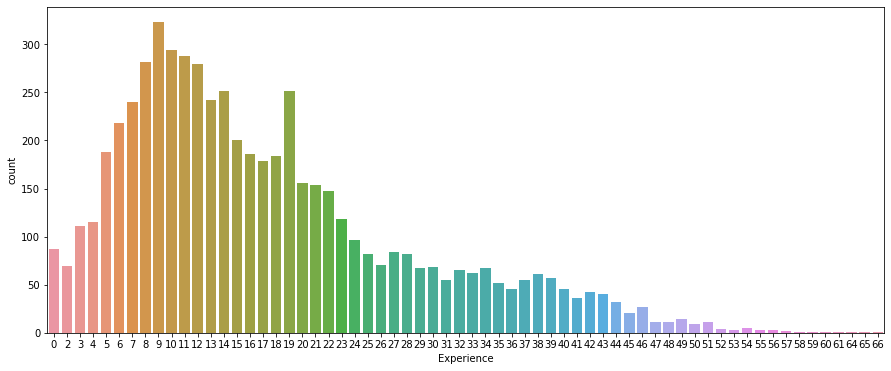

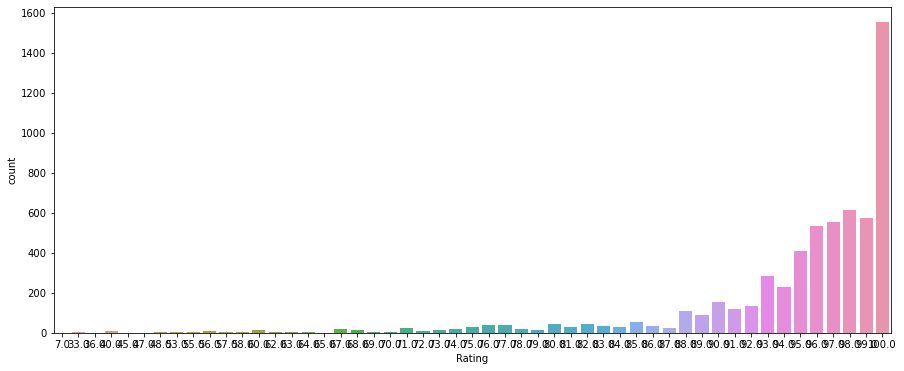

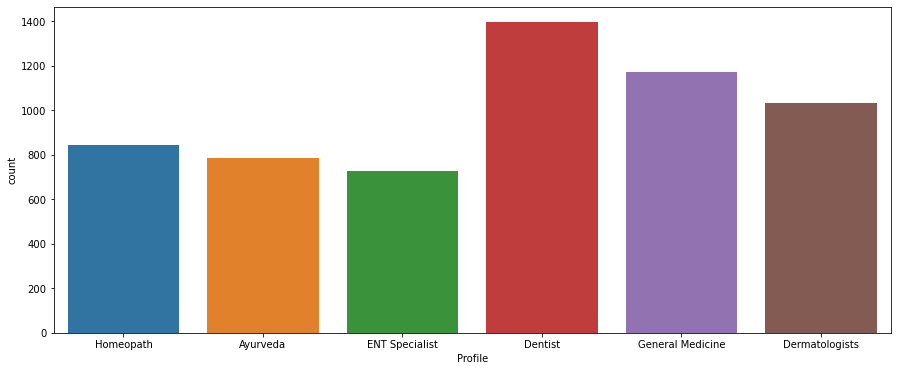

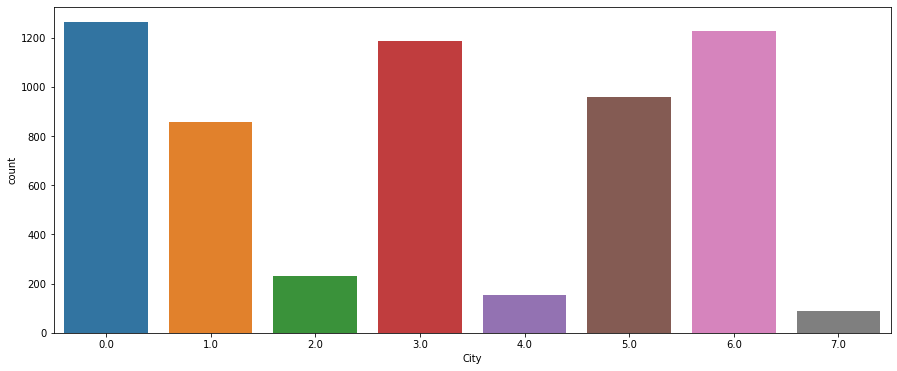

In [77]:
#using visualization technique to analyse the variables
df_analysis = df_train[['Experience','Rating','Profile','City']]
for i in df_analysis:
    plt.figure(figsize = [15,6])
    sns.countplot(df_analysis[i])
    plt.xlabel(i)
    plt.show()

Observations :
1. Most of the doctors has an experience between 5 years to 19 years
2. Around 2000 doctors has 100 ratings. Also, most of the Doctors are rated more than 90. 
3. Most of the doctors has profile as Dentist as compared to other profiles,followed by General medicine and Dermatologists.\
4. Most of the doctors are from Bangalore(1), Delhi(3) ,Mumbai(6) ,ernakulam(0).

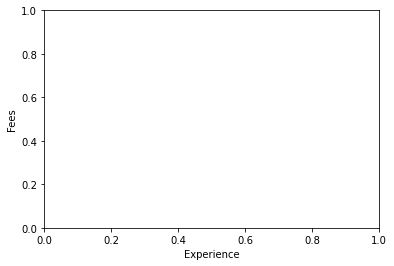

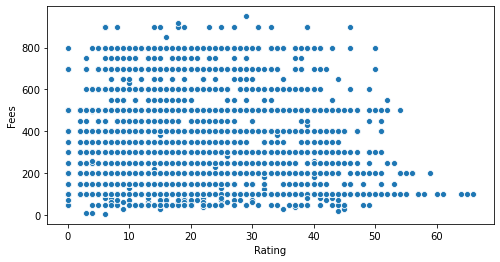

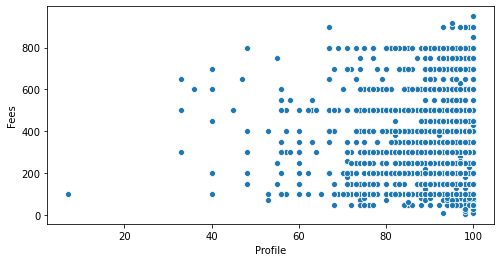

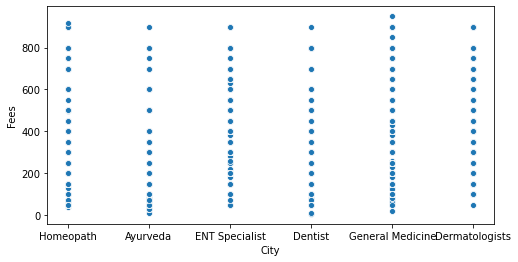

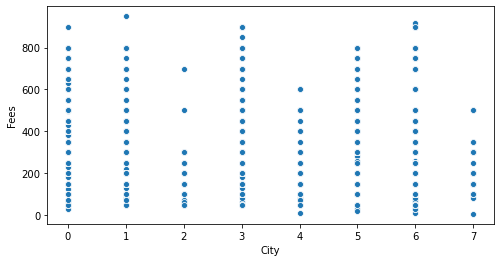

In [80]:
#using scatterplot
Scatter_plot =df_train[['Experience','Rating','Profile','City']]
for i in Scatter_plot:
    x = Scatter_plot[i]
    y = df_train["Fees"]
    plt.xlabel(i)
    plt.ylabel("Fees")
    plt.figure(figsize = [8,4])
    sns.scatterplot(x,y)

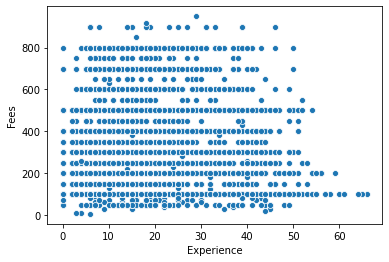

In [84]:
sns.scatterplot(df_train['Experience'],df_train['Fees'])

Observations: 
1. the fees of doctors in chennai is lower as compared to other cities doctors, that is less than 400 rupees.
whereas no such trends can be seen in other scatter plots

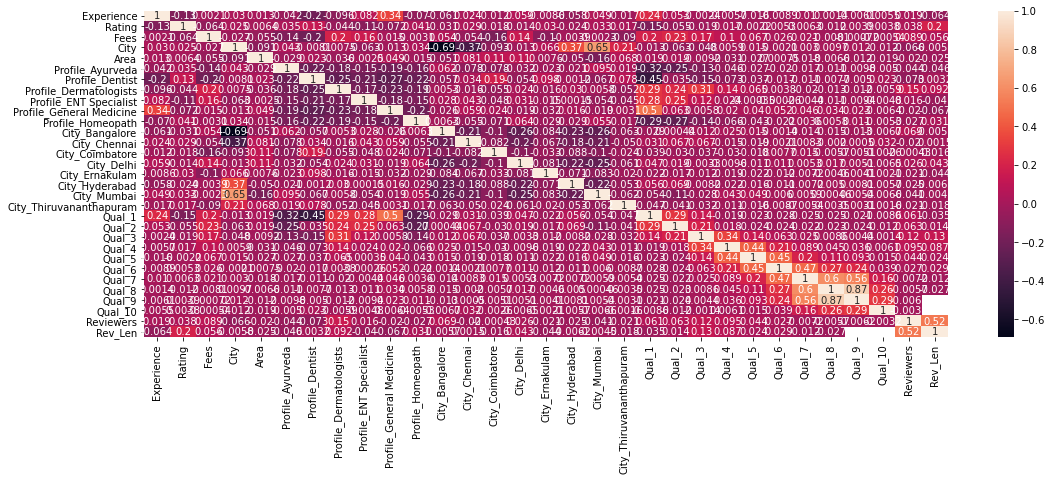

In [85]:
#correlation
corr_matrix = df_train.corr()
plt.figure(figsize = [18,6])
sns.heatmap(corr_matrix,annot = True)

In [128]:
corr_d = corr_matrix['Fees'].sort_values(ascending = False)
corr_d

Fees                        1.000000
Qual_2                      0.232099
Profile_Dermatologists      0.204408
Qual_1                      0.195845
Qual_3                      0.165078
Profile_ENT Specialist      0.155068
City_Delhi                  0.142896
Qual_4                      0.102347
Reviewers                   0.089216
Qual_5                      0.066715
Rev_Len                     0.056363
City_Bangalore              0.054274
Qual_6                      0.026397
Qual_7                      0.020744
Profile_General Medicine    0.015439
Experience                  0.002143
Qual_10                    -0.000540
Qual_9                     -0.000721
City_Mumbai                -0.002268
Profile_Homeopath          -0.003093
City_Hyderabad             -0.003883
Qual_8                     -0.008059
City                       -0.027279
City_Chennai               -0.053686
Area                       -0.054986
Rating                     -0.064158
City_Thiruvananthapuram    -0.090181
C

Observations: 
1. Qual_2 and Profile_Dermatologists are most correlated to Fees with values 0.232 and 0.204 respectively.
2. City_Coimbatore and Profile_Dentist are most negatively correlated to Fees variable with values -0.202 and -0.161 respectively.
3. Qual_9 and Qual10 are least correlated to the fees variable.

In [30]:
#creating dummies of profile and city for test set
temp = pd.get_dummies(df_test[['Profile', 'City']], prefix_sep = '_', prefix = ['Profile', 'City'])
df_test = pd.concat([df_test, temp], axis=1, join = 'inner')
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City,Area,Profile_Ayurveda,Profile_Dentist,...,Profile_General Medicine,Profile_Homeopath,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram
0,MBBS,35,0.0,"Ghatkopar East, Mumbai",General Medicine,NaN,Mumbai,Ghatkopar East,0,0,...,1,0,0,0,0,0,0,0,1,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0.0,"West Marredpally, Hyderabad",ENT Specialist,NaN,Hyderabad,West Marredpally,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"MBBS, DDVL",40,70.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar,0,0,...,0,0,0,1,0,0,0,0,0,0
3,BAMS,0,70.0,"New Ashok Nagar, Delhi",Ayurveda,NaN,Delhi,New Ashok Nagar,1,0,...,0,0,0,0,0,1,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road,0,1,...,0,0,1,0,0,0,0,0,0,0


In [31]:
def sortQual(text):
    arr = re.sub(r'\(.*?\)', lambda x: x.group().replace(",","-"), text) # to replace ',' with '-' inside brackets only
    return (sorted(arr.lower().replace(" ","").split(",")))

In [32]:
df_train['Qualification'] = df_train['Qualification'].apply(lambda x : sortQual(x))
df_test['Qualification'] = df_test['Qualification'].apply(lambda x : sortQual(x))

In [33]:
qual_dict = {}

train_quals = []
test_quals = []

train_quals.append(list(df_train['Qualification'].values))
test_quals.append(list(df_test['Qualification'].values))

for quals in train_quals[0]:
    for item in quals:
        if item in qual_dict:
            qual_dict[item] += 1
        else:
            qual_dict[item] = 1
            
for quals in test_quals[0]:
    for item in quals:
        if item in qual_dict:
            qual_dict[item] += 1
        else:
            qual_dict[item] = 1

In [34]:
qual_df = pd.DataFrame.from_dict(dict(sorted(qual_dict.items(), key = lambda x : x[1] , reverse = True)), orient = 'index').reset_index()
qual_df.columns = ['Qualification', 'Count']
qual_df.tail()

,Qualification,Count
890,fellowshipindiabetesmanagement,1
891,frcp-internalmedicine,1
892,fais,1
893,fiages,1
894,md/ms-obstetrics&gynaecology,1


In [36]:
x = qual_df[qual_df['Qualification'] == '39yearsexperience'].index
qual_df = qual_df.drop(x)
qual_df["Code"] = qual_df["Qualification"].astype('category').cat.codes
qual_df.head()

,Qualification,Count,Code
0,mbbs,3788,579
1,bds,1790,31
2,bams,1007,28
3,bhms,998,33
4,md-dermatology,802,615


In [37]:
conversion_dict = dict(zip(qual_df['Qualification'], qual_df['Code']))
conversion_dict['39yearsexperience'] = -1

In [38]:
stat_test = df_test.Qualification.apply(lambda x: len(x))
df_test[df_test['Qualification'].str.len()>10]['Qualification']

stat_train = df_train.Qualification.apply(lambda x: len(x))
stat_train.max()

10

In [40]:
train_quals = []
for i in range(stat_train.max()):
    col_name = 'Qual_' + str(i+1)
    train_quals.append(col_name)
    col_i = df_train['Qualification'].str[i]
    df_train[col_name] = col_i
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area,Profile_Ayurveda,...,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
0,"[bhms, md-homeopathy]",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,0,...,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[bams, md-ayurvedamedicine]",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,1,...,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[mbbs, ms-otorhinolaryngology]",9,98.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,0,...,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[bams, bsc-zoology]",12,98.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,1,...,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[bams],20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,1,...,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
test_quals = []
for j in range(stat_test.max()):
    col_name = 'Qual_' + str(j+1)
    test_quals.append(col_name)
    col_j = df_test['Qualification'].str[j]
    df_test[col_name] = col_j
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City,Area,Profile_Ayurveda,Profile_Dentist,...,Qual_8,Qual_9,Qual_10,Qual_11,Qual_12,Qual_13,Qual_14,Qual_15,Qual_16,Qual_17
0,[mbbs],35,0.0,"Ghatkopar East, Mumbai",General Medicine,NaN,Mumbai,Ghatkopar East,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[diplomainotorhinolaryngology(dlo), mbbs]",31,0.0,"West Marredpally, Hyderabad",ENT Specialist,NaN,Hyderabad,West Marredpally,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[ddvl, mbbs]",40,70.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[bams],0,70.0,"New Ashok Nagar, Delhi",Ayurveda,NaN,Delhi,New Ashok Nagar,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[bds, mds-conservativedentistry&endodontics]",16,100.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
for i in train_quals:
    df_train.replace({i: conversion_dict}, inplace=True)
    df_train[i] = df_train[i].fillna(-1)

for i in test_quals:
    df_test.replace({i: conversion_dict}, inplace=True)
    df_test[i] = df_test[i].fillna(-1)

In [43]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area,Profile_Ayurveda,...,Qual_1,Qual_2,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10
0,"[bhms, md-homeopathy]",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,0,...,33,623.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,"[bams, md-ayurvedamedicine]",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,1,...,28,605.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,"[mbbs, ms-otorhinolaryngology]",9,98.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,0,...,579,739.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,"[bams, bsc-zoology]",12,98.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,1,...,28,40.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,[bams],20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,1,...,28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [44]:
df_train['Reviewers'] = df_train['Miscellaneous_Info'].str.split('% ').str[1].str.split(' ').str[0]
df_train['Reviewers'] = df_train['Reviewers'].fillna(0)
df_train['Rev_Len'] = df_train['Reviewers'].str.len()
df_train.loc[df_train['Rev_Len']>3, 'Reviewers'] = 0
df_train.loc[df_train['Reviewers']==',', 'Reviewers'] = 0
df_train['Reviewers'] = df_train['Reviewers'].astype(int)
df_train['Reviewers'].head()

0    16
1    76
2     0
3     0
4     4
Name: Reviewers, dtype: int32

In [45]:
df_test['Reviewers'] = df_test['Miscellaneous_Info'].str.split('% ').str[1].str.split(' ').str[0]
df_test['Reviewers'] = df_test['Reviewers'].fillna(0)
df_test['Rev_Len'] = df_test['Reviewers'].str.len()
df_test.loc[df_test['Rev_Len']>3, 'Reviewers'] = 0
df_test.loc[df_test['Reviewers']==',', 'Reviewers'] = 0
df_test['Reviewers'] = df_test['Reviewers'].astype(int)
df_test['Reviewers'].head()

0    0
1    0
2    4
3    0
4    0
Name: Reviewers, dtype: int32

In [46]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area,Profile_Ayurveda,...,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Reviewers,Rev_Len
0,"[bhms, md-homeopathy]",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,16,2.0
1,"[bams, md-ayurvedamedicine]",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,76,2.0
2,"[mbbs, ms-otorhinolaryngology]",9,98.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,NaN
3,"[bams, bsc-zoology]",12,98.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,NaN
4,[bams],20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,1.0


In [47]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_train[['City']] = oe.fit_transform(df_train[['City']])
df_train[['Area']] = oe.fit_transform(df_train[['Area']])


In [63]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_test[['City']] = oe.fit_transform(df_test[['City']])
df_test[['Area']] = oe.fit_transform(df_test[['Area']])

In [48]:
selected_cols = [i for i in df_train.columns if i not in ['Qualification', 'Place', 'Miscellaneous_Info', 'Fees', 'Profile', 'Rev_Len', 'Experience', 'Rating']]

In [64]:
selected_cols1 = [i for i in df_test.columns if i not in ['Qualification', 'Place', 'Miscellaneous_Info', 'Fees', 'Profile', 'Rev_Len', 'Experience', 'Rating']]

In [69]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area,Profile_Ayurveda,...,Qual_3,Qual_4,Qual_5,Qual_6,Qual_7,Qual_8,Qual_9,Qual_10,Reviewers,Rev_Len
0,"[bhms, md-homeopathy]",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,4.0,296.0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,16,2.0
1,"[bams, md-ayurvedamedicine]",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0.0,855.0,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,76,2.0
2,"[mbbs, ms-otorhinolaryngology]",9,98.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0.0,452.0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,NaN
3,"[bams, bsc-zoology]",12,98.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0.0,68.0,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,NaN
4,[bams],20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1.0,335.0,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"[mbbs, ms-ent]",19,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,0.0,70.0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,45,2.0
5957,[mbbs],33,98.0,"Nungambakkam, Chennai",General Medicine,NaN,100,1.0,535.0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,NaN
5958,[mbbs],41,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,3.0,215.0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,11,2.0
5959,"[mbbs, md-generalmedicine]",15,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,6.0,840.0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,NaN


In [50]:
from sklearn.model_selection import train_test_split
X = df_train[selected_cols]
y = df_train['Fees']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [53]:
from sklearn.svm import SVR
svr = SVR(gamma = 0.1)
svr.fit(X_train,y_train)
pred = svr.predict(scaler.transform(X_test))

In [61]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

score(pred,y_test)

0.7875090101404822

In [58]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
scorer = make_scorer(score,greater_is_better=True)

In [59]:
from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg2 = GridSearchCV(reg,param_grid=parameters,scoring=scorer, n_jobs=-1,cv=4)

In [60]:
reg2.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SVR(gamma=0.1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(score))

In [62]:
ans2 = reg2.predict(scaler.transform(X_test))
score(ans2, y_test)

0.8019163733736641

In [90]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X = scaler.fit_transform(df_train[selected_cols])
y = df_train['Fees']
X_test = scaler.transform(df_test[selected_cols])

reg3 = SVR(gamma = 0.1)

parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg4 = GridSearchCV(reg3,param_grid=parameters,scoring='r2', n_jobs=-1,cv=4)
reg4.fit(X,y)
ans = reg4.predict(X_test)

In [91]:
ansX = reg4.predict(X)
print("Training data score {}".format(score(y, ansX)))

Training data score 0.8069173345004632


In [92]:
s = pd.Series(ans)
s.values[:10]

array([199.29449738, 304.89957252, 302.28217072, 253.33942495,
       216.37424151, 198.11325231, 360.47637884, 200.91321909,
       284.716053  , 295.1472705 ])

### Using KNN Regressor

In [95]:
from sklearn.model_selection import train_test_split
X = df_train[selected_cols]
y = df_train['Fees']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
poly = PolynomialFeatures(2)

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_2 = poly.fit_transform(X_train)

In [97]:
neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train_2, y_train)
X_test = scaler.transform(X_test)
X_test_2 = poly.transform(X_test)
ans = neigh.predict(X_test_2)

In [98]:
score(ans,y_test)

0.780826262532289

In [99]:
scaler = StandardScaler()
X = scaler.fit_transform(df_train[selected_cols])
y = df_train['Fees']
X_test = scaler.transform(df_test[selected_cols])

neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X, y)

ans = neigh.predict(X)
score(ans,y)

0.8073776201898599

In [100]:
from sklearn.model_selection import train_test_split
X = df_train[selected_cols]
y = df_train['Fees']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

poly = PolynomialFeatures(3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_2 = poly.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_test_2 = scaler.transform(X_test)
parameters = {'n_neighbors':np.arange(2,20)}

neigh = KNeighborsRegressor()

reg = GridSearchCV(neigh,param_grid=parameters,scoring=scorer, n_jobs=-1,cv=4)
reg.fit(X,y)
ans = reg.predict(X_test)
reg.best_estimator_

KNeighborsRegressor(n_neighbors=15)

In [101]:
X = scaler.fit_transform(df_train[selected_cols])
X_2 = poly.fit_transform(X)
y = df_train['Fees']
X_test = scaler.transform(df_test[selected_cols])
X_test_2 = poly.transform(X_test)

neigh = KNeighborsRegressor()
parameters = {'n_neighbors':np.arange(2,20)}

reg = GridSearchCV(neigh,param_grid=parameters,scoring=scorer, n_jobs=-1,cv=4)
reg.fit(X_2,y)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring=make_scorer(score))

In [120]:
model = KNeighborsRegressor(n_neighbors = 10,n_jobs =-1)
model.fit(X_2,y)
ans = model.predict(X_2)
print("Traing data score {}".format(score(ans,y)))

Traing data score 0.8220151818823798


In [122]:
ans = model.predict(X_test_2)

s = pd.Series(ans)
s.values[:10]

array([225., 295., 355., 310., 325., 340., 365., 200., 315., 260.])

In [123]:
#Saving KNeighboursRegressor:
import joblib
joblib.dump(model,'Doctor consultation fee.pkl')

['Doctor consultation fee.pkl']